In [4]:
import pandas as pd
# Taken & PCA
# raw_df = pd.read_csv('./features_data_resample/HRV_Takens&pca.csv')
# raw_label = pd.read_csv('./features_data_resample/HRV_Takens&pca_label.csv')

# Original featuers
#raw_df = pd.read_csv('./features_data_resample/HRV_Original.csv')
#raw_label = pd.read_csv('./features_data_resample/HRV_Original_label.csv')

# HRV+localPHI
raw_df = pd.read_csv('./features_data_resample/HRV_all.csv')
raw_label = pd.read_csv('./features_data_resample/HRV_all_label.csv')
subject_id = pd.read_csv('./features_data_resample/subjectId.csv')
X = raw_df
y = raw_label
print(y.shape,X.shape, subject_id.shape)

(84447, 1) (84447, 97) (84447, 1)


In [14]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
import numpy as np
def plot_confusion_matrix(actual_val, pred_val, title=None):
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])
    
    plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')
    
    if title is None:
        pass
    else:
        plot.set_title(title)
        
    plt.show()
    return confusion_matrix

def cal_confmatrix(n_range,y_true,y_pred):
    cm  = np.zeros([n_range,n_range])
    for i in range(1,n_range+1):
        for j in range(1,n_range+1):
            cm[i-1,j-1] += sum((y_true == i) & (y_pred == j))
    return cm



In [6]:
N = int(subject_id.max())
n_stage = 3
CM = np.zeros([n_stage,n_stage])
for i in range(1,N+1):
    sub_id = (subject_id['1'] == i) # The ['1'] is to select first column so that the range will be a series not df
    X_test = X[sub_id]
    X_train = X[~sub_id]
    y_test = y[sub_id].values.flatten() # The Model expect 1d array
    y_train = y[~sub_id].values.flatten()
    model = lgb.LGBMClassifier(is_unbalance=False)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, pred))
    CM += cal_confmatrix(n_stage ,y_test,pred)

Accuracy: 0.6354334438654666
Accuracy: 0.60695339143615
Accuracy: 0.604490337248958
Accuracy: 0.6151004168245547
Accuracy: 0.6147214854111406
Accuracy: 0.5865858279651384
Accuracy: 0.6276998863205759
Accuracy: 0.6489200454717696


In [9]:
print('Acc = ', sum(np.diag(CM))/sum(sum(CM)))
stat = np.zeros([3,n_stage])
for i in range(n_stage):
    stat[0,i] = CM[i,i]/sum(CM[:,i])
    stat[1,i] = CM[i,i]/sum(CM[i,:])
    stat[2,i] = 2*stat[0,i]*stat[1,i]/(stat[0,i]+stat[1,i])
    
macroF1 = sum(stat[2,:])/n_stage
print('macroF1 = ', macroF1)

Acc =  0.6174878918138004
macroF1 =  0.5939169503652887


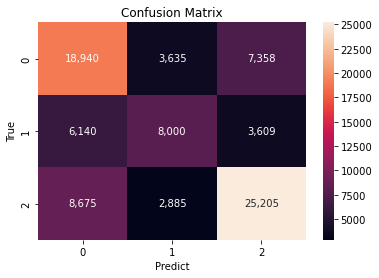

In [15]:
plot = sns.heatmap(CM, annot=True, fmt=',.0f')
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
statt = np.transpose(stat)
print(CM)
print(statt)
# name of csv file 
filename = "result.csv"
DF = pd.DataFrame(np.concatenate((CM,statt),axis=1))
DF.to_csv(filename)

[[18940.  3635.  7358.]
 [ 6140.  8000.  3609.]
 [ 8675.  2885. 25205.]]
[[0.56110206 0.63274647 0.59477453]
 [0.55096419 0.45072962 0.49583191]
 [0.69680969 0.68557052 0.69114441]]


# Original Code

In [21]:
# # Leave-one-out cross validation cutting
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# print('X_train:', X_train.shape)
# print('X_test:', X_test.shape)

In [22]:
# import lightgbm as lgb
# model = lgb.LGBMClassifier(is_unbalance=True)
# model.fit(X_train,y_train)

In [23]:
# from sklearn.metrics import accuracy_score
# pred=model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, pred))

In [24]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# def plot_confusion_matrix(actual_val, pred_val, title=None):
    # confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   # rownames=['Actual'],
                                   # colnames=['Predicted'])
    
    # plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')
    
    # if title is None:
        # pass
    # else:
        # plot.set_title(title)
        
    # plt.show()
    # return confusion_matrix

In [25]:
# import numpy as np
# q = np.array(y_test)
# q = q.reshape((-1,))
# print(q.shape)
# print(pred.shape)

In [26]:
# plot_confusion_matrix(q, pred)